In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import math
import seaborn as sns
from scipy import optimize
from scipy.optimize import minimize


In [2]:
def get_params(sys,mres):
    
    path1='/Users/psz898/OneDrive/Documents/SCIENCE/UCPH/info_comp/cpmg_for_korznev/cpmg_fit/ci2/leave_one_out/'
    #systemf = 'backups_wt2/'
    systemf = 'backups_'+sys+'_no'+str(mres)+'/'
    
    file_par = open(f'{path1}{systemf}fit_allr_allt_2st_ord0.par')
    count = 0
    temp = []
    pA = []
    pA_err = []
    kAB = []
    kAB_err = []
    cs_res = []
    cs = []
    cs_err = []
    
    regexPA = re.compile("[PA:|PB:]\s+(\d+)\s+(\d.\d+)\s+(\d.\d+)\s+\w\s*")
    # PA:         5   0.957329   0.000000   f
    regexKAB = re.compile("KAB:\s+\d+\s+(\d+.\d+)\s+(\d+.\d+)\s+\w\s*")
    
    regexCS = re.compile("CS\d_[A\|B]:\s+(\d+)\s+N\s+\d\s+(-?\d+.\d+)\s+(\d+.\d+)\s+\w\s*")
    
    
    
    while True: 
        count += 1
      
        # Get next line from file 
        line = file_par.readline() 
      
        # if line is empty 
        # end of file is reached 
        if not line: 
            break
        resultPA = regexPA.search(line)
        resultKAB = regexKAB.search(line)
        resultCS = regexCS.search(line)
    
        
        #print("Line{}: {}".format(count, line.strip())) 
        if resultPA:
            #print (result.group(1), result.group(2), result.group(3))
            temp.append(int(resultPA.group(1)))
            pA.append(float(resultPA.group(2)))
            pA_err.append(float(resultPA.group(3)))
         
        if resultKAB:
            #print (resultKAB.group(1), resultKAB.group(2))
            kAB.append(float(resultKAB.group(1)))
            kAB_err.append(float(resultKAB.group(2)))
        
        if resultCS:
            #print (resultCS.group(1), resultCS.group(2), resultCS.group(3))
            cs_res.append(float(resultCS.group(1)))
            cs.append(float(resultCS.group(2)))
            cs_err.append(float(resultCS.group(3)))
    
        
        
    file_par.close() 
    
    rows, cols = (3, 1) 
    PA = [[0 for i in range(cols)] for j in range(rows)]
    KAB = [[0 for i in range(cols)] for j in range(rows)]
    CS = [[0 for i in range(cols)] for j in range(rows)]
    
    kelvin=273.15
    celsius=0
    t_type=celsius
    
    PA[0]=[x+t_type for x in temp[1::2]]
    
    PA[1]=[x*100 for x in pA[0::2]]
    PA[2]=[x*100 for x in pA_err[1::2]]
    
    PAtr= np.array(PA).T
    
    KAB[0]=[x+t_type for x in temp[1::2]] 
    KAB[1]=kAB
    KAB[2]=kAB_err
    KABtr= np.array(KAB).T
    
    CS[0] = cs_res[1::2]
    CS[1] = cs[1::2]
    CS[2] = cs_err[1::2]
    CStr= np.array(CS).T
    
    
    df_pA = pd.DataFrame(PAtr, columns=["T", "pA", "pA_err"])
    df_pA['T']= df_pA['T'].astype(int)
    df_pA['mres']=mres
    
    df_KAB = pd.DataFrame(KABtr, columns=["T", "Kex", "Kex_err"])
    df_KAB['T']= df_KAB['T'].astype(int)
    df_KAB['mres']=mres
    
    df_CS = pd.DataFrame(CStr, columns=["res", "CS", "CS_err"])
    df_CS['res']=df_CS['res'].astype(int)
    df_CS['mres']=mres
    
    #df_pA
    return df_pA,df_KAB,df_CS


In [3]:
#WT
df_pA_no24, df_KAB_no24, df_CS_no24 = get_params('i57v',24)
df_pA_no26, df_KAB_no26, df_CS_no26 = get_params('i57v',26)
df_pA_no40, df_KAB_no40, df_CS_no40 = get_params('i57v',40)
df_pA_no44, df_KAB_no44, df_CS_no44 = get_params('i57v',44)
df_pA_no45, df_KAB_no45, df_CS_no45 = get_params('i57v',45)
df_pA_no47, df_KAB_no47, df_CS_no47 = get_params('i57v',47)

pdList = [df_pA_no24,df_pA_no26,df_pA_no40,df_pA_no44,df_pA_no45,df_pA_no47]  # List of your dataframes
df_pA = pd.concat(pdList)

pdList = [df_KAB_no24,df_KAB_no26,df_KAB_no40,df_KAB_no44,df_KAB_no45,df_KAB_no47]  # List of your dataframes
df_KAB = pd.concat(pdList)

pdList = [df_CS_no24,df_CS_no26,df_CS_no40,df_CS_no44,df_CS_no45,df_CS_no47]  # List of your dataframes
df_CS = pd.concat(pdList)

xx = 0

to_append24 = [24, xx, xx, 24]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append24

to_append26 = [26, xx, xx, 26]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append26

to_append40 = [40, xx, xx, 40]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append40

to_append44 = [44, xx, xx, 44]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append44

to_append45 = [45, xx, xx, 45]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append45

to_append47 = [47, xx, xx, 47]
df_CS_length = len(df_CS)
df_CS.loc[df_CS_length] = to_append47


df_CS=df_CS.reset_index()

df_KAB



,T,Kex,Kex_err,mres
0,5,736.298,29.007,24
1,25,4749.491,158.073,24
0,5,718.557,24.886,26
1,25,4623.450,152.225,26
0,5,704.583,29.565,40
1,25,4663.461,155.919,40
0,5,849.314,32.952,44
1,25,4109.919,224.598,44
0,5,732.648,23.309,45
1,25,4646.777,139.003,45


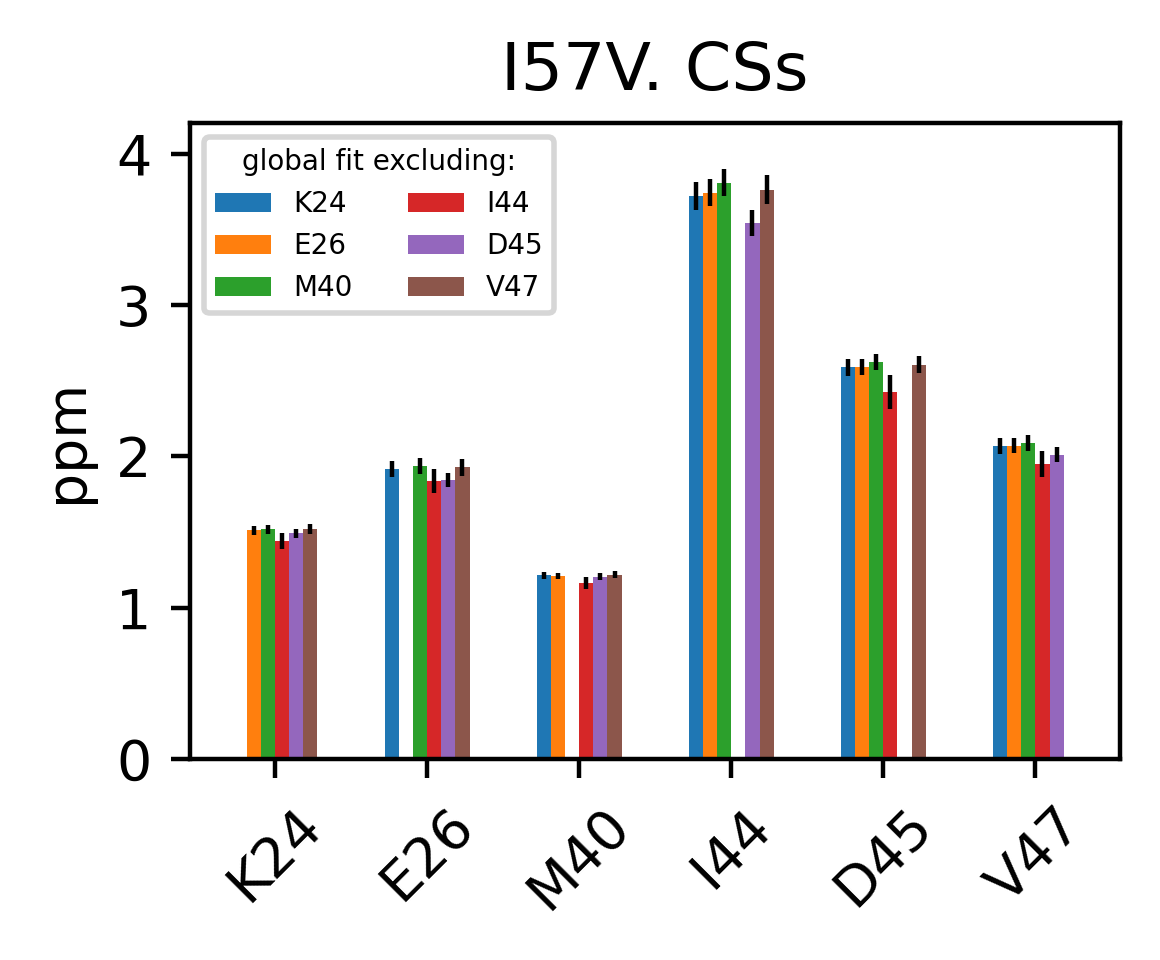

In [4]:
def grouped_barplot(df, cat,subcat, val , err, type1, syst):
    fig, axs = plt.subplots(ncols=1,figsize=(3,2.5),dpi=400)
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)*1.3
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        dfg = dfg.sort_values(by=[cat])
        new_x = [2*i for i in x]
        axs.bar(new_x+offsets[i], abs(dfg[val].values), width=width, error_kw=dict(lw=0.8, capsize=0, capthick=0),
                label="{} {}".format(subcat, gr), yerr=dfg[err].values)#, color=colors[i]
    #plt.xlabel(cat)

    #plt.xlabel("Residues")    
    plt.ylim([0,4.2])
    plt.ylabel('ppm')
    plt.xticks(x, u)
    plt.title(f"{syst}. CSs")
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')#, fontsize = 20
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')
    #plt.legend(['A-B','5-25\u00b0C'],ncol=1,prop={"size":5})
    leg = plt.legend(['K24','E26','M40','I44','D45','V47'],ncol=2,prop={"size":5},loc='upper left')
    leg.set_title("global fit excluding:", prop = {'size':5})
    
    
    #plt.show()
    #plt.yticks([0,10,20,30]);
    xlabels = ['K24','E26','M40','I44','D45','V47']
    plt.xticks([i*2 for i in x], xlabels)

    plt.xticks(fontsize=10, rotation=45)
    axs.set_xticklabels(xlabels);
    
    plt.tight_layout()
    
    plt.savefig(f'CI2_{syst}_2Temp_{type1}.pdf');

    

syst  = 'I57V'
cat = "res"
subcat = "mres"
val = "CS"
err = "CS_err"
type1 = "CS"
grouped_barplot(df_CS, cat, subcat, val, err, type1 , syst)


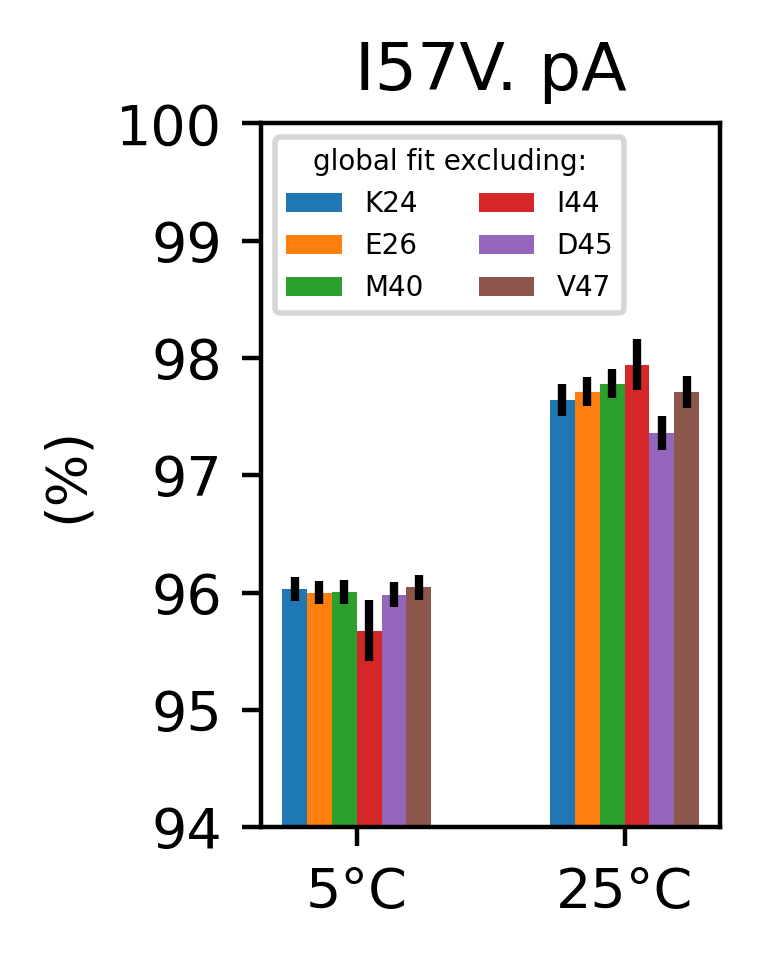

In [5]:

def grouped_barplot(df, cat,subcat, val , err, type1, syst):
    fig, axs = plt.subplots(ncols=1,figsize=(2,2.5),dpi=400)
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)*1.3
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        new_x = [2*i for i in x]
        axs.bar(new_x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values)#, color=colors[i]
    #plt.xlabel(cat)
    #plt.xlabel("Temperature (˚C)")    
    #plt.ylabel(val)
    plt.ylabel('(%)')
    plt.ylim([94,100])
    plt.xticks(x, u)
    plt.title(f'{syst}. {type1}')
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')#, fontsize = 20
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')
    #plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],ncol=1,prop={"size":5})
    leg = plt.legend(['K24','E26','M40','I44','D45','V47'],ncol=2,prop={"size":5},loc='upper left')
    leg.set_title("global fit excluding:", prop = {'size':5})

    
    xlabels = ['5\u00b0C','25\u00b0C']
    plt.xticks([i*2 for i in x], xlabels)

    plt.xticks(fontsize=10, rotation=0)
    axs.set_xticklabels(xlabels);
    
    plt.tight_layout()
    
    plt.savefig(f'CI2_{syst}_2Temp_{type1}.pdf');

syst= 'I57V'
cat = "T"
subcat = "mres"
val = "pA"
err = "pA_err"
type1 = "pA"
grouped_barplot(df_pA, cat, subcat, val, err, type1, syst )

/Users/psz898/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/psz898/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


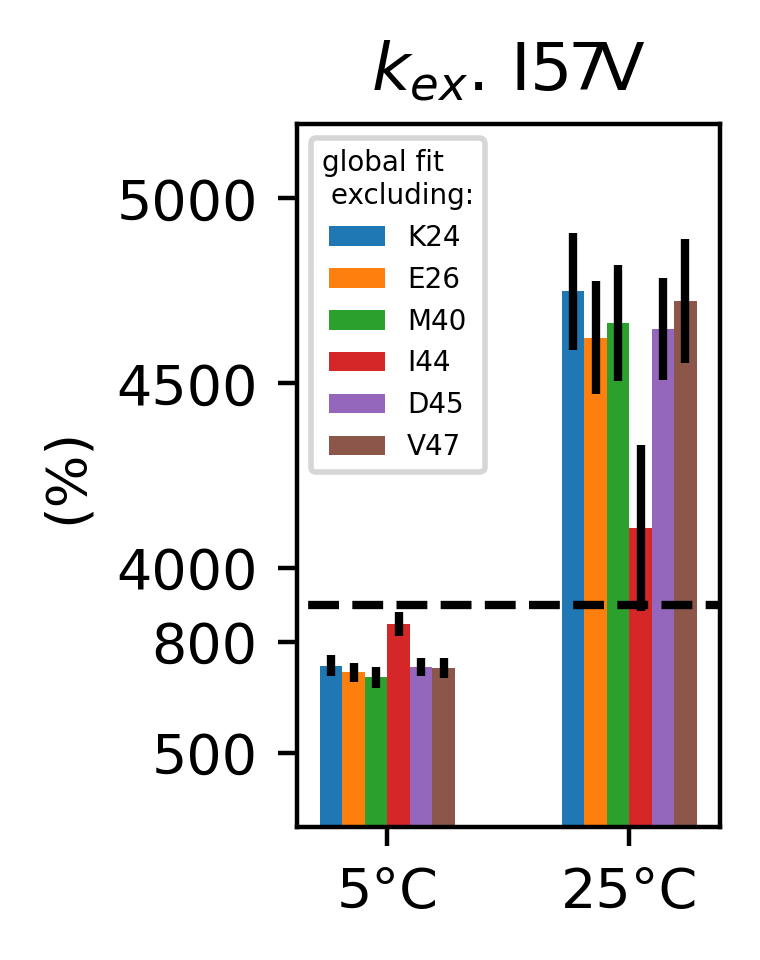

In [6]:
def grouped_barplot(df, cat,subcat, val , err, type1, syst):
    fig, axs = plt.subplots(ncols=1,figsize=(2,2.5),dpi=400)
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)*1.3
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        new_x = [2*i for i in x]
        axs.bar(new_x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values)#, color=colors[i]
    #plt.xlabel(cat)
    #plt.xlabel("Residues")    
    #plt.ylabel(val)
    plt.ylabel('(%)')
    #plt.ylim([95,100])
    plt.xticks(x, u)
    plt.title("$ k_{ex} $. "+syst)

    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')#, fontsize = 20
    #plt.title( '$ S^2_{axis} $ @' + str(field) +' MHz')
    #plt.legend(['5\u00b0C','10\u00b0C','15\u00b0C','20\u00b0C','25\u00b0C'],ncol=1,prop={"size":5})
    leg = plt.legend(['K24','E26','M40','I44','D45','V47'],ncol=1,prop={"size":5},loc='upper left')
    leg.set_title("global fit\n excluding:", prop = {'size':5})

    #plt.yticks([600,800,1000,1200,1400],('600','800','4500','4700','4900'));

    xlabels = ['5\u00b0C','25\u00b0C']
    plt.xticks([i*2 for i in x], xlabels)

    plt.xticks(fontsize=10, rotation=0)
    plt.plot([-10,10],[900,900],'k--')
    plt.xlim([-0.75, 2.75])
    plt.yticks([500,800,1000,1500,2000],('500','800','4000','4500','5000'));
    plt.ylim([300, 2200])
    
    axs.set_xticklabels(xlabels);
    
    plt.tight_layout()
    
    plt.savefig(f'CI2_{syst}_2Temp_{type1}.pdf');
    
syst = 'I57V'    
cat = "T"
subcat = "mres"
val = "Kex"
err = "Kex_err"
type1 = "Kex"

corr1 = 3000
df_KAB['Kex'].iloc[1::2]=df_KAB['Kex'].iloc[1::2]-corr1

grouped_barplot(df_KAB, cat, subcat, val, err, type1, syst )
df_KAB['Kex'].iloc[1::2]
df_KAB['Kex'].iloc[1::2]=df_KAB['Kex'].iloc[1::2]+corr1


